# Credit Risk Analysis Using Machine Learning

## Problem Statement

The first phase of this project is to see what is our data made about. Which variables are numerical or categorical and which columns have "Null" values, which is something we will address in the feature engineering phase.

## Data Understanding

As a first step, we look at the data. Numpy and Pandas libraries in python are excellent tools for data exploration. For the data visualization we mainly use the matplotlib and the seaborn libraries. We import these libraries into our workspace.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Features

Age (numeric)

Gender (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

##  Loading and Understanding the Dataset

In [2]:
# Load Dataset
gc_data = pd.read_csv("german_credit_data.csv")
print (gc_data.columns)
gc_data.head()

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


### Descriptive Statistics

In [3]:
# Shape of Dataset
print("Shape of Credit Card Dataset is: ",gc_data.shape)
#information of Dataset
gc_data.info()
#Description of Dataset
gc_data.describe()

Shape of Credit Card Dataset is:  (1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## Exploratory Data Analysis

#### Missing Values and Handling

In [4]:
gc_data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [5]:
#finding out unique variables
print('The unique value of Purpose is: ',gc_data.Purpose.unique())
print('The unique value of Sex is: ',gc_data.Sex.unique())
print('The unique value of Housing is: ',gc_data.Housing.unique())
print('The unique value of Checking Account is: ',gc_data['Checking account'].unique())
print('The unique value of Saving accounts is: ',gc_data['Saving accounts'].unique())

The unique value of Purpose is:  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
The unique value of Sex is:  ['male' 'female']
The unique value of Housing is:  ['own' 'free' 'rent']
The unique value of Checking Account is:  ['little' 'moderate' nan 'rich']
The unique value of Saving accounts is:  [nan 'little' 'quite rich' 'rich' 'moderate']


In [6]:
# Seperate Categorical and Numerical Columns
numerical = ['Credit amount','Age','Duration']
categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
unused = ['Unnamed: 0']
# Drop unused Column
gc_data = gc_data.drop(columns = unused)
# Shape of Dataset
gc_data.shape

(1000, 10)

In [7]:
# Fill the missing values in Categorical Data
for cat in categorical:
    gc_data[cat] = gc_data[cat].fillna(gc_data[cat].mode().values[0])
gc_data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [8]:
# Display Categorical Data
cat = gc_data.select_dtypes(include=['object']).columns
cat_gcd = gc_data[cat]
cat_gcd

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
0,male,own,little,little,radio/TV,good
1,female,own,little,moderate,radio/TV,bad
2,male,own,little,little,education,good
3,male,free,little,little,furniture/equipment,good
4,male,free,little,little,car,bad
...,...,...,...,...,...,...
995,female,own,little,little,furniture/equipment,good
996,male,own,little,little,car,good
997,male,own,little,little,radio/TV,good
998,male,free,little,little,radio/TV,bad


In [9]:
#Display Numerical Data
num = gc_data.select_dtypes(exclude=['object']).columns
num_gcd = gc_data[num]
num_gcd

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24
...,...,...,...,...
995,31,1,1736,12
996,40,3,3857,30
997,38,2,804,12
998,23,2,1845,45


## Visualization of Dataset

In [10]:
import seaborn as sns

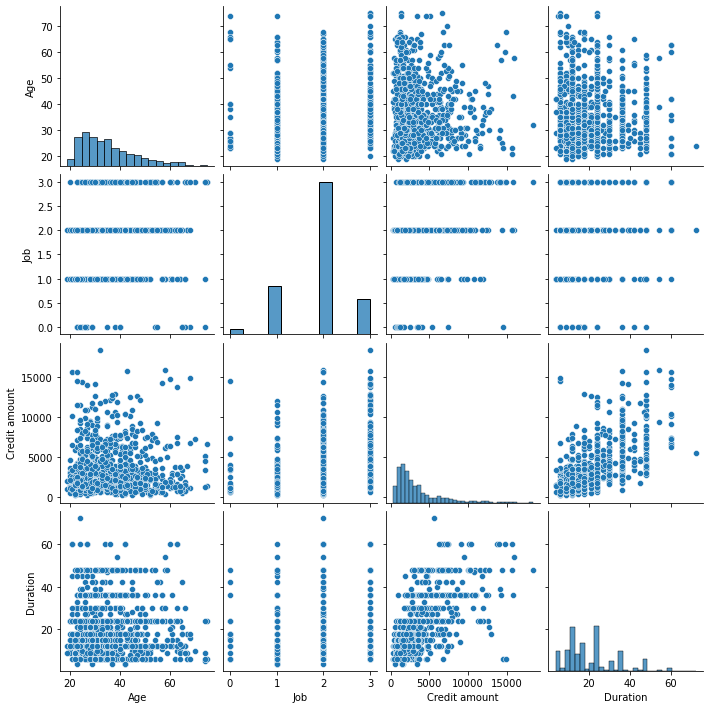

In [11]:
# The diagram shows pairplot of all the numerical features
sns.pairplot(gc_data)

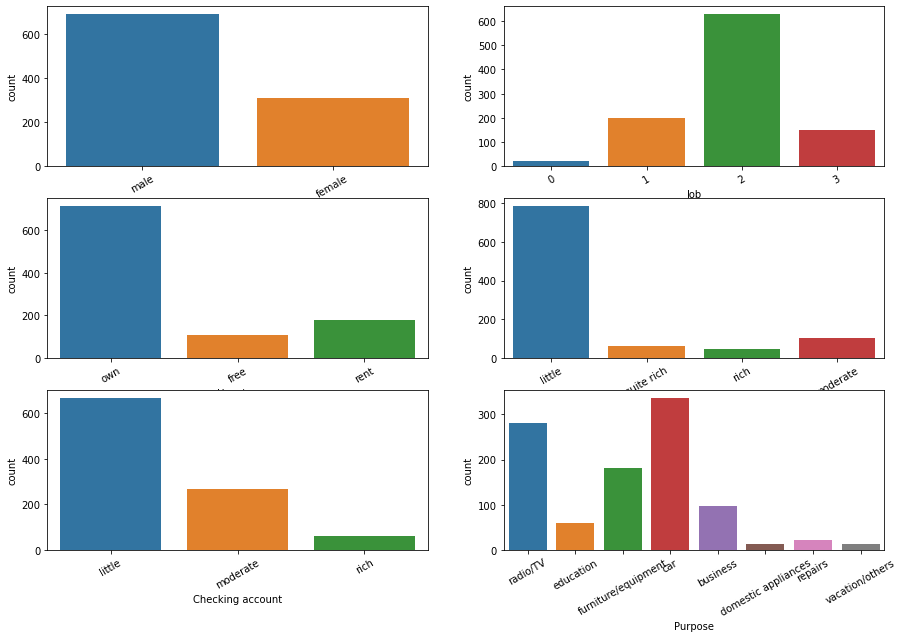

In [12]:
# Show data visualization through subplot
fig = plt.figure(figsize = (15,10))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = gc_data, x = cat)
    plt.xticks(rotation=30)
plt.show()

Conclusions from Plots above:

1. Men are more in number than women

2. Most of the customer are skilled on their job

3. Most of the customer have their own house

4. Most of the customers have little saving account

5. Most of the customer use credit for car

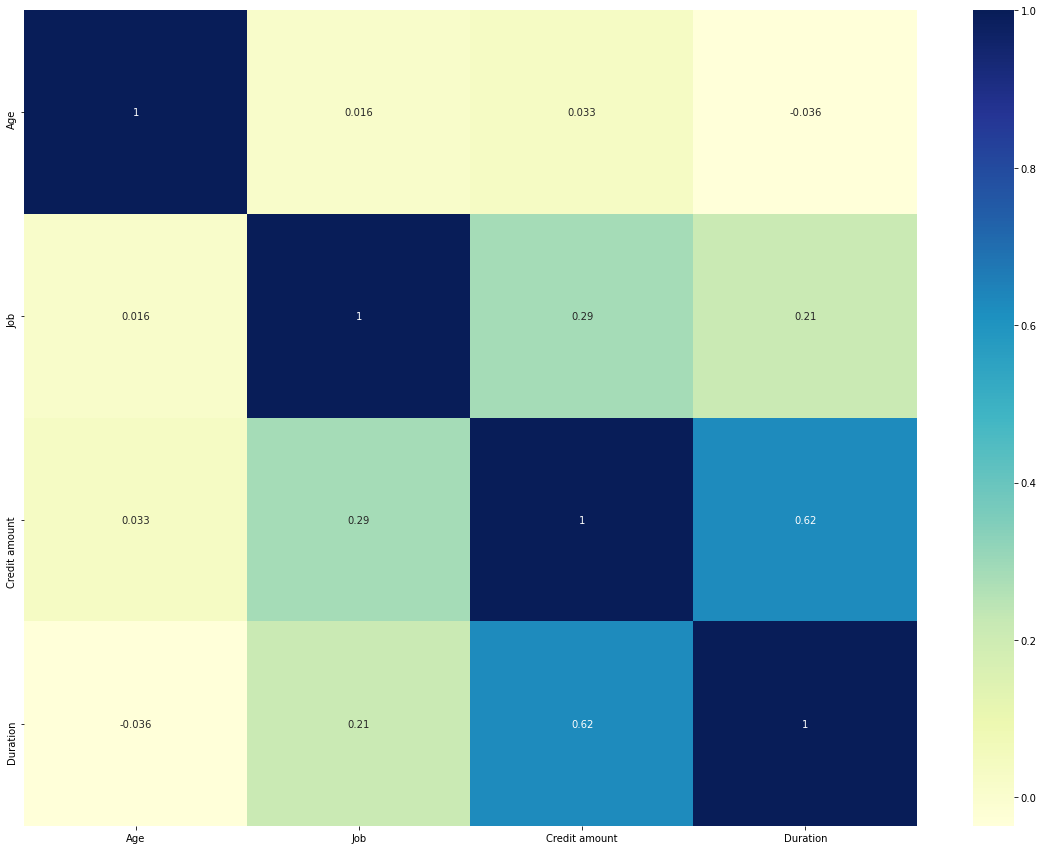

In [13]:
#create Correlation to mask the repetitive value for each pair

plt.figure(figsize = (20, 15))
sns.heatmap(gc_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

The heatmap shows best correlation between credit amount and duration.

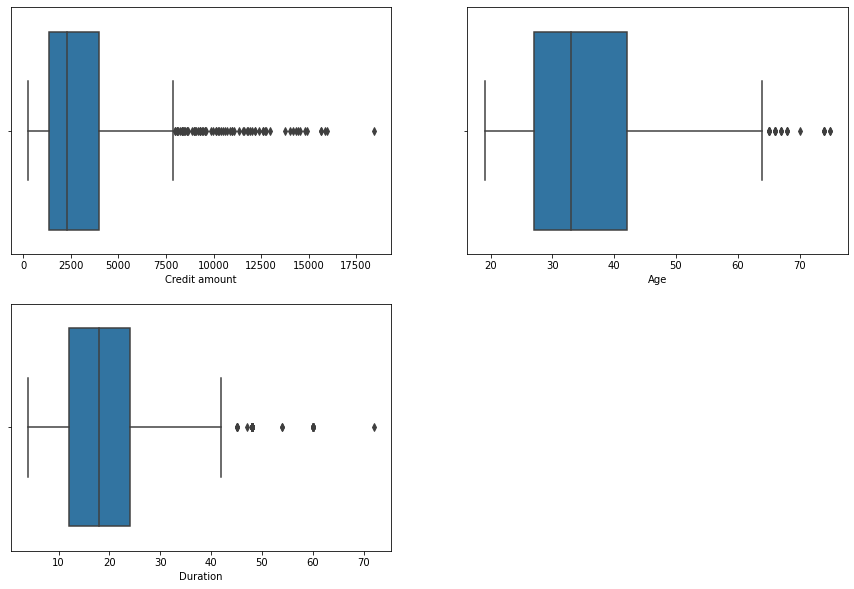

In [14]:
#The box plot shows outliers in the numerical features
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = gc_data, x = num)
plt.show()

No handles with labels found to put in legend.


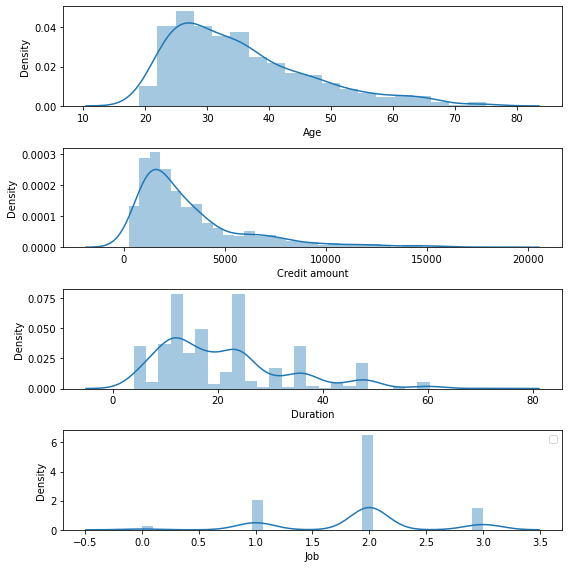

In [15]:
# For Normal Distribution
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,8))
sns.distplot(gc_data["Age"], ax=ax1)
sns.distplot(gc_data["Credit amount"], ax=ax2)
sns.distplot(gc_data["Duration"], ax=ax3)
sns.distplot(gc_data["Job"], ax=ax4)
plt.tight_layout()
plt.legend()

## Data Pre-processing

In [16]:
# Analysis with LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for cat in categorical:
    gc_data[cat] = encoder.fit_transform(gc_data[cat])

In [17]:
gc_data[categorical] # call column

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,1,2,1,0,0,5
1,0,2,1,0,1,5
2,1,1,1,0,0,3
3,1,2,0,0,0,4
4,1,2,0,0,0,1
...,...,...,...,...,...,...
995,0,1,1,0,0,4
996,1,3,1,0,0,1
997,1,2,1,0,0,5
998,1,2,0,0,0,5


In [18]:
# Replace values
gc_data['Risk'].replace(to_replace='good', value=1, inplace=True)
gc_data['Risk'].replace(to_replace='bad',  value=0, inplace=True)

In [19]:
gc_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


In [20]:
# to get Duplicate data from orignal Dataset
gcd_dummies = pd.get_dummies(gc_data)
gcd_dummies.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


<AxesSubplot:>

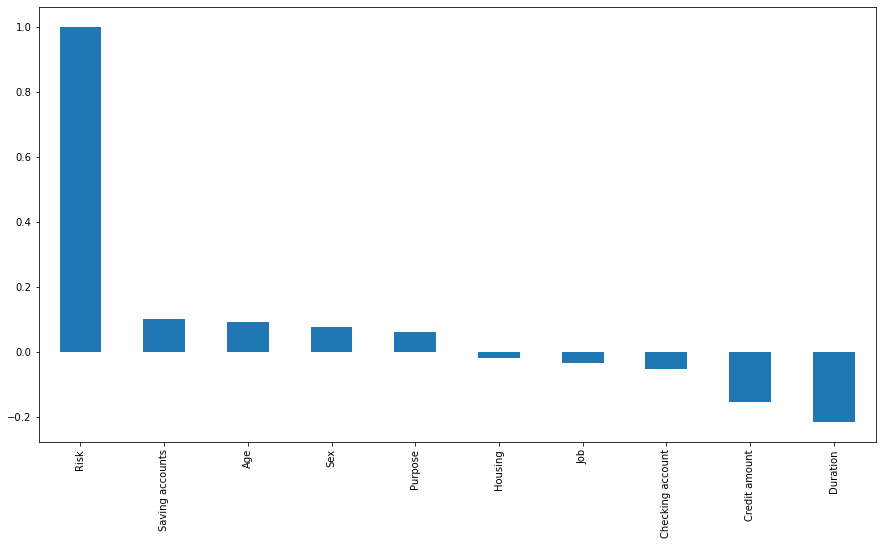

In [21]:
# Show duplicates with barplot
plt.figure(figsize=(15,8))
gcd_dummies.corr()['Risk'].sort_values(ascending = False).plot(kind='bar')

In [22]:
# making variable x,y and drop 'Risk' column
y = gcd_dummies['Risk'].values
X = gcd_dummies.drop(columns = ['Risk'])

## Predicting the Risk

### Train Test Splitting

In [23]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [24]:
# Shape of Train Test Prediction
print("X_train shape : ", X_train.shape) 
print("X_test shape  : ", X_test.shape) 
print("y_train shape : ", y_train.shape) 
print("y_test shape  : ", y_test.shape)

X_train shape :  (800, 9)
X_test shape  :  (200, 9)
y_train shape :  (800,)
y_test shape  :  (200,)


## Import some Libraries

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Model Fitting and Evaluation

## GaussianNB

In [26]:
gnb = GaussianNB().fit(X_train, y_train) 
prediction = gnb.predict(X_test)

In [27]:
# Making a Classification Reports of models
def classification_report(model):
    prediction = model.predict(X_test)
    # Print the prediction accuracy
    accuracy = metrics.accuracy_score(y_test, prediction)
    confusion_matrix = metrics.confusion_matrix(y_test, prediction)
    classification = metrics.classification_report(y_test, prediction)
    
    print('Classifier :',model)
    print("\n Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)

In [28]:
classification_report(gnb)

Classifier : GaussianNB()

 Model Accuracy:
 0.7

Confusion matrix:
 [[ 17  41]
 [ 19 123]]

Classification report:
               precision    recall  f1-score   support

           0       0.47      0.29      0.36        58
           1       0.75      0.87      0.80       142

    accuracy                           0.70       200
   macro avg       0.61      0.58      0.58       200
weighted avg       0.67      0.70      0.68       200



In [29]:
# Plot confusion matrix of predicted models
class_names=[1,0]
def plot_conf_matrix(y_test, prediction_test, class_names):
    cnf_matrix = metrics.confusion_matrix(y_test, prediction_test)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

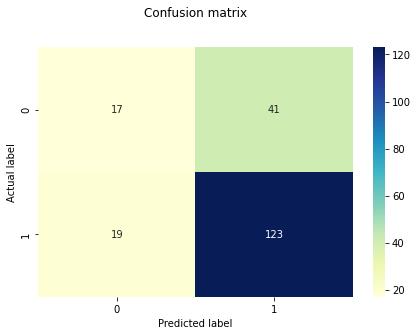

In [30]:
plot_conf_matrix(y_test, prediction, class_names)

In [31]:
# Making Roc Curve Function
def plot_roc(model,X_test,y_test):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='NB')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve')
    plt.show()

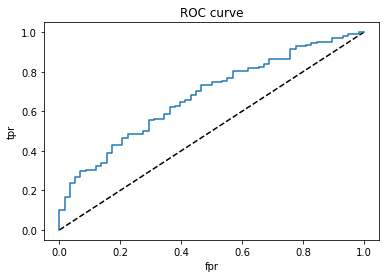

In [32]:
plot_roc(gnb,X_test,y_test)

## BernouliNB

In [33]:
bnb = BernoulliNB().fit(X_train, y_train) 
prediction = bnb.predict(X_test)

In [34]:
classification_report(bnb)

Classifier : BernoulliNB()

 Model Accuracy:
 0.71

Confusion matrix:
 [[  0  58]
 [  0 142]]

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.71      1.00      0.83       142

    accuracy                           0.71       200
   macro avg       0.35      0.50      0.42       200
weighted avg       0.50      0.71      0.59       200



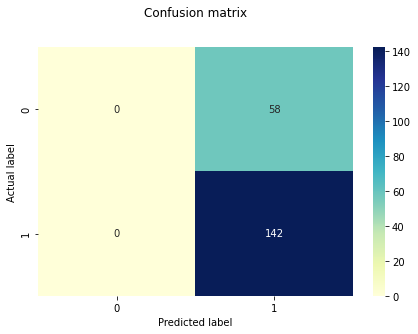

In [35]:
plot_conf_matrix(y_test, prediction, class_names)

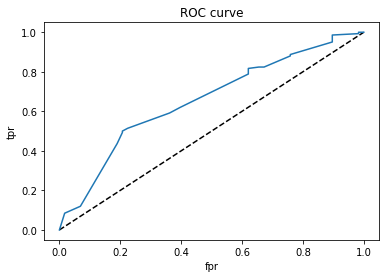

In [36]:
plot_roc(bnb,X_test,y_test)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train) 
prediction = lr.predict(X_test)

In [38]:
classification_report(lr)

Classifier : LogisticRegression()

 Model Accuracy:
 0.71

Confusion matrix:
 [[ 10  48]
 [ 10 132]]

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.17      0.26        58
           1       0.73      0.93      0.82       142

    accuracy                           0.71       200
   macro avg       0.62      0.55      0.54       200
weighted avg       0.67      0.71      0.66       200



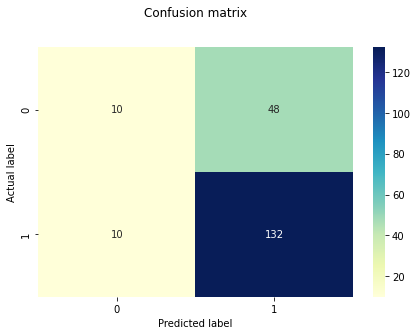

In [39]:
plot_conf_matrix(y_test, prediction, class_names)

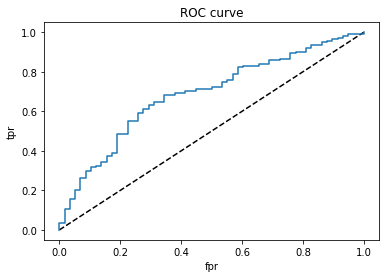

In [40]:
plot_roc(lr,X_test,y_test)

## KNN Classification

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train) 
prediction = knn.predict(X_test)

In [42]:
classification_report(knn)

Classifier : KNeighborsClassifier(n_neighbors=7)

 Model Accuracy:
 0.67

Confusion matrix:
 [[ 12  46]
 [ 20 122]]

Classification report:
               precision    recall  f1-score   support

           0       0.38      0.21      0.27        58
           1       0.73      0.86      0.79       142

    accuracy                           0.67       200
   macro avg       0.55      0.53      0.53       200
weighted avg       0.62      0.67      0.64       200



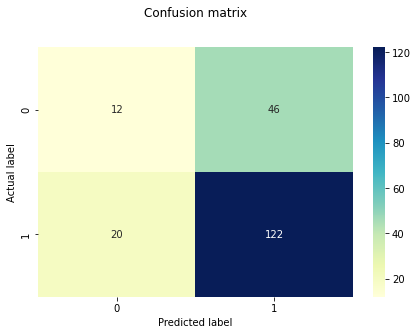

In [43]:
plot_conf_matrix(y_test, prediction, class_names)

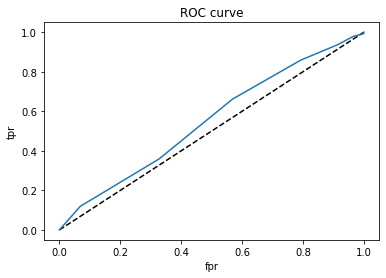

In [44]:
plot_roc(knn,X_test,y_test)

## Decision Tree Classification

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

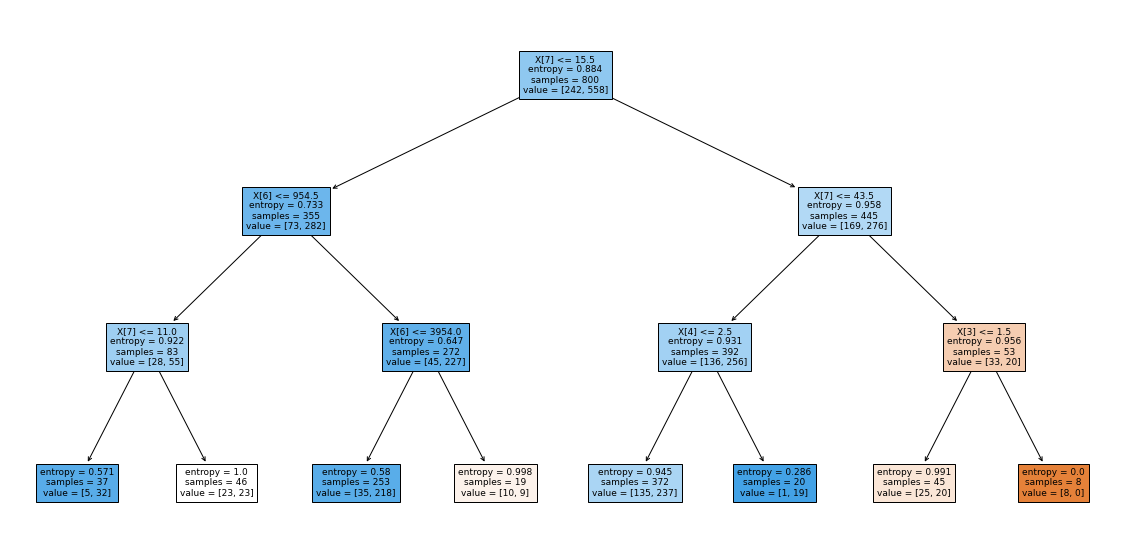

In [46]:
plt.figure(figsize=(20,10))
plot_tree(dtc,fontsize=9,filled=True)
plt.show()

In [47]:
prediction=dtc.predict(X_test)

In [48]:
classification_report(dtc)

Classifier : DecisionTreeClassifier(criterion='entropy', max_depth=3)

 Model Accuracy:
 0.665

Confusion matrix:
 [[ 10  48]
 [ 19 123]]

Classification report:
               precision    recall  f1-score   support

           0       0.34      0.17      0.23        58
           1       0.72      0.87      0.79       142

    accuracy                           0.67       200
   macro avg       0.53      0.52      0.51       200
weighted avg       0.61      0.67      0.62       200



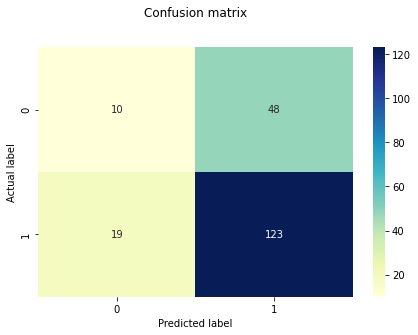

In [49]:
plot_conf_matrix(y_test, prediction, class_names)

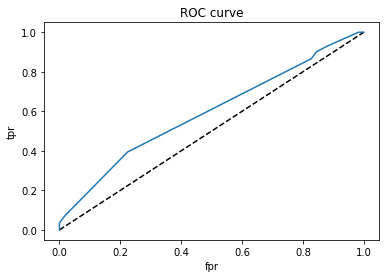

In [50]:
plot_roc(dtc,X_test,y_test)

## Random Forest Classification

In [51]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train) 
prediction = rfc.predict(X_test)

In [52]:
classification_report(rfc)

Classifier : RandomForestClassifier(n_estimators=200)

 Model Accuracy:
 0.695

Confusion matrix:
 [[ 20  38]
 [ 23 119]]

Classification report:
               precision    recall  f1-score   support

           0       0.47      0.34      0.40        58
           1       0.76      0.84      0.80       142

    accuracy                           0.69       200
   macro avg       0.61      0.59      0.60       200
weighted avg       0.67      0.69      0.68       200



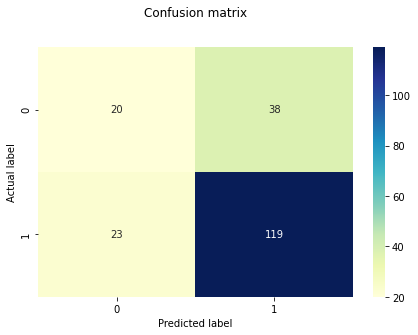

In [53]:
plot_conf_matrix(y_test, prediction, class_names)

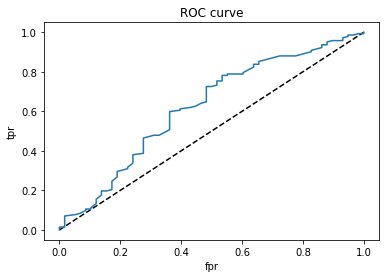

In [54]:
plot_roc(rfc,X_test,y_test)

## FEATURES IMPORTANCE OF RFC

In [55]:
importances = rfc.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.29415059479342753, 'Credit amount'), (0.20860406670092269, 'Age'), (0.17032939877192596, 'Duration'), (0.09408685465953466, 'Purpose'), (0.06176425613258429, 'Job'), (0.0484672460205292, 'Housing'), (0.047116412779134406, 'Checking account'), (0.04332618832297176, 'Saving accounts'), (0.03215498181896963, 'Sex')]


In [56]:
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)

<AxesSubplot:>

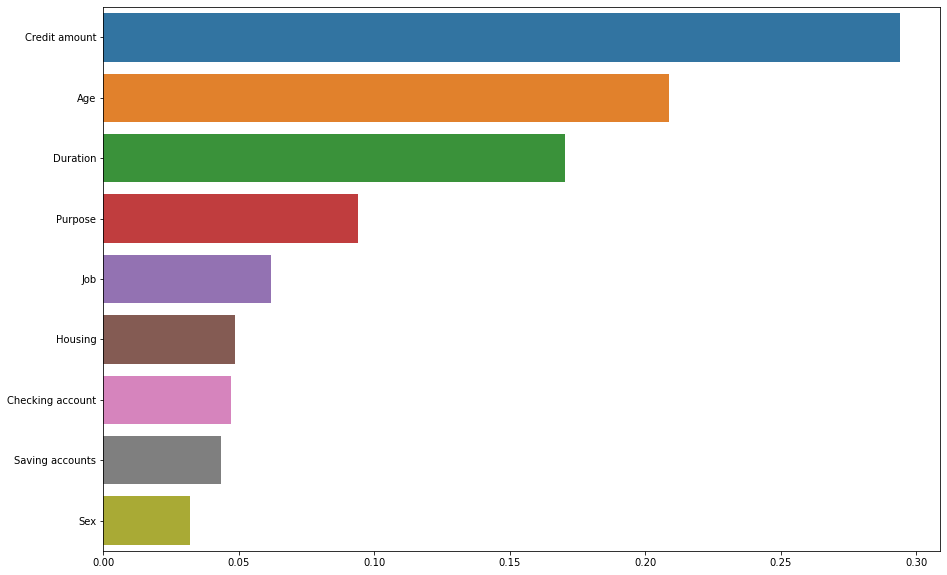

In [57]:
plt.figure(figsize=(15,10))
sns.barplot(x=feature_imp, y=feature_imp.index)

## Ada Boost Classification

In [58]:
from sklearn.ensemble import AdaBoostClassifier 
abc = AdaBoostClassifier().fit(X_train, y_train) 
prediction = abc.predict(X_test)

In [59]:
classification_report(abc)

Classifier : AdaBoostClassifier()

 Model Accuracy:
 0.73

Confusion matrix:
 [[ 20  38]
 [ 16 126]]

Classification report:
               precision    recall  f1-score   support

           0       0.56      0.34      0.43        58
           1       0.77      0.89      0.82       142

    accuracy                           0.73       200
   macro avg       0.66      0.62      0.62       200
weighted avg       0.71      0.73      0.71       200



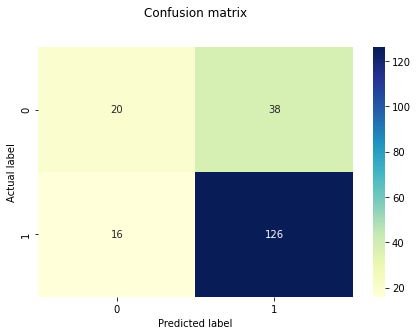

In [60]:
class_names=[0,1]
plot_conf_matrix(y_test, prediction, class_names)

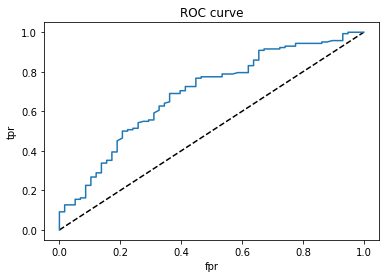

In [61]:
plot_roc(abc,X_test,y_test)

## XGradient Boosting Classification

In [62]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier().fit(X_train, y_train) 
prediction=gbc.predict(X_test)

In [63]:
classification_report(gbc)

Classifier : GradientBoostingClassifier()

 Model Accuracy:
 0.725

Confusion matrix:
 [[ 18  40]
 [ 15 127]]

Classification report:
               precision    recall  f1-score   support

           0       0.55      0.31      0.40        58
           1       0.76      0.89      0.82       142

    accuracy                           0.73       200
   macro avg       0.65      0.60      0.61       200
weighted avg       0.70      0.72      0.70       200



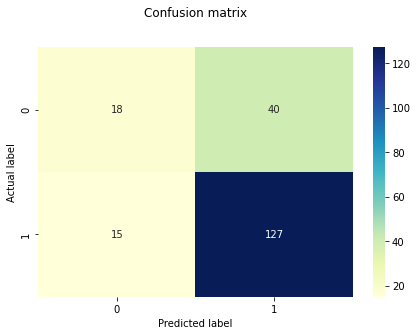

In [64]:
plot_conf_matrix(y_test, prediction, class_names)

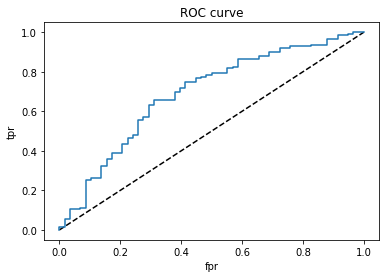

In [65]:
plot_roc(gbc,X_test,y_test)

## Summary of Visualization
 
Cars, Radio/TV and Furniture and Equipment made more than 50 % of the total risk and has the highest distribution of credit issued
The rest of the purposes were not frequent purposes in applying for a loan.
Cars and Radio/TV purposes were the less risky from the operative perspective since it had the widest gap between good and bad risk.